Cumulative degree distribution shows the probability that the degree of a node picked at random is larger than $n$.

Cumulative deg distr: $C_{k} = \sum_{k'=k}^{\infty} p_{k'}$

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections

In [2]:
def MakeDegDistr(G, N):
    deg_seq = [deg for node, deg in G.degree()] #degree sequence
    deg_count = collections.Counter(deg_seq) #degree and corresponding count
    
    count_dict = {}
    k_max = max(deg_seq)
    for k in range(0, k_max+1):
        count_dict[k] = 0 #initialize all to zero
    
    for k, cnt in deg_count.items():
        count_dict[k] = cnt
    
    k_list = list(count_dict.keys()) #list of degrees
    cnt_list = list(count_dict.values()) #list of counts
    
    cumul_cnt_list = np.zeros_like(cnt_list)
    for k in k_list:
        cumul_cnt_list[k] = sum(cnt_list[k:])
    
    pk_list = np.array(cnt_list)/N #list of degree distr
    ck_list = cumul_cnt_list/N
    
    pk_dict = {'k': k_list, 'cnt': cnt_list, 'pk': pk_list,
               'cumul_cnt': cumul_cnt_list, "ck": ck_list}
    pk_df = pd.DataFrame(data=pk_dict,
                         columns=['k', 'cnt', 'pk', 'cumul_cnt', 'ck'])
    
    return (pk_df)

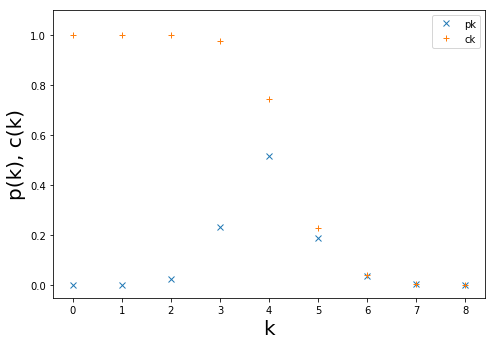

CPU times: user 328 ms, sys: 31.5 ms, total: 359 ms
Wall time: 392 ms


In [3]:
%%time

G1 = nx.watts_strogatz_graph(2000, 4, 0.2)
N1 = G1.number_of_nodes()

pk_df_1 = MakeDegDistr(G1, N1)
#----------------------------------------
# Degree distribution plot using log scales.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df_1["k"], pk_df_1["pk"], "x", label="pk")
ax.plot(pk_df_1["k"], pk_df_1["ck"], "+", label="ck")

# ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_ylim(top=1.1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k), c(k)", fontsize=20)
# ax.set_title("Degree Distribution (using log scales)", fontsize=20)

plt.legend()
plt.show()

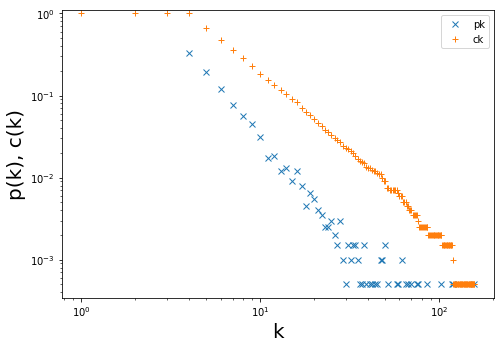

CPU times: user 634 ms, sys: 19 ms, total: 653 ms
Wall time: 659 ms


In [4]:
%%time

G2 = nx.barabasi_albert_graph(2000, 4)
N2 = G2.number_of_nodes()

pk_df_2 = MakeDegDistr(G2, N2)
#----------------------------------------
# Degree distribution plot using log scales.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df_2["k"], pk_df_2["pk"], "x", label="pk")
ax.plot(pk_df_2["k"], pk_df_2["ck"], "+", label="ck")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(top=1.1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k), c(k)", fontsize=20)
# ax.set_title("Degree Distribution (using log scales)", fontsize=20)

plt.legend()
plt.show()